In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from time import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets
Axes3D

n_neighbors = 10
n_components = 2
colors = ['blue', 'orange','green','red','purple','brown','cyan','olive']

In [2]:
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold con %i neighbors"
             % (n_neighbors), fontsize=14)

In [3]:
Xdf_raw = pd.read_csv("../IndoorFingerprint.csv").drop("Y", axis=1)
Ydf_raw = pd.read_csv("../IndoorFingerprint.csv").drop("X", axis=1)

In [4]:
atribute_numbers = Xdf_raw.shape[1]-1

In [5]:
methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']


In [6]:
# Se normalizan los datos para ambos

scaler = preprocessing.StandardScaler()
Xdf_raw.iloc[:, 1:atribute_numbers+1] = scaler.fit_transform(Xdf_raw.iloc[:, 1:atribute_numbers+1])
X_std = Xdf_raw.iloc[:, 1:atribute_numbers+1]
y = Xdf_raw.iloc[:,0]

mclasses= sorted(list(set(y)))
N = len(mclasses)

In [7]:
# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)


In [8]:
for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='dense',
                                        method=method,
                                        n_jobs = 4).fit_transform(X_std)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    scat = plt.scatter(Y[:, 0], Y[:, 1], c = y, cmap=cmap)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

standard: 87 sec
ltsa: 85 sec
hessian: 1e+02 sec
modified: 88 sec


Isomap: 53 sec
MDS: 4e+02 sec


c:\users\felip\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


SpectralEmbedding: 10 sec
t-SNE: 2.4e+02 sec


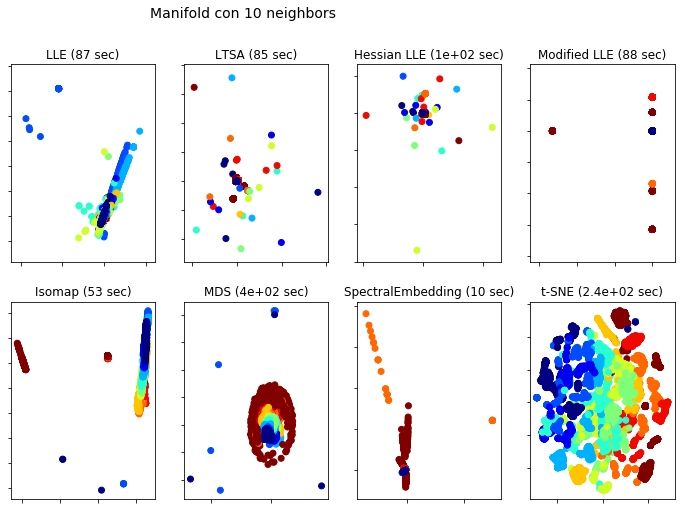

In [9]:
t0 = time()
Y = manifold.Isomap(n_neighbors, n_components, n_jobs=4).fit_transform(X_std)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c = y, cmap=cmap)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1, n_jobs=4)
Y = mds.fit_transform(X_std)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c = y, cmap=cmap)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors, n_jobs=4)
Y = se.fit_transform(X_std)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c = y, cmap=cmap)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X_std)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c = y, cmap=cmap)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()